# EXPLORATORY DATA ANALYSIS AND INSIGHTS GENERATION

## 1. Importing Librarires

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

### 1.1 *Setting Style for Visualisation*

In [2]:
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (12, 6)

## 2. Loading and initial exlporation of data

In [3]:
df = pd.read_csv('vehicle_repairs.csv')

# Display dimensions about the dataframe
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())  

Dataset Shape: (100, 52)

First 5 rows:


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,01-02-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,01-03-2024,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,01-04-2024,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,01-04-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,01-05-2024,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [4]:
# Display basic information about the dataframe
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VIN                            100 non-null    object 
 1   TRANSACTION_ID                 100 non-null    int64  
 2   CORRECTION_VERBATIM            100 non-null    object 
 3   CUSTOMER_VERBATIM              100 non-null    object 
 4   REPAIR_DATE                    100 non-null    object 
 5   CAUSAL_PART_NM                 95 non-null     object 
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object 
 7   PLATFORM                       100 non-null    object 
 8   BODY_STYLE                     100 non-null    object 
 9   VPPC                           100 non-null    object 
 10  PLANT                          99 non-null     object 
 11  BUILD_COUNTRY                  100 non-null    object 
 12  LAST_KNOWN_DLR_NAME            100 no

### 2.1 Descriptive statistics for numerical columns

In [5]:
print("\nDescriptive Statistics:")
display(df.describe(include='all').transpose())


Descriptive Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
VIN,100,98,3HRS9EED0LH255650,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRANSACTION_ID,100.0,NaN,NaN,NaN,13036.9,12.028166,13021.0,13027.75,13036.0,13041.25,13081.0
CORRECTION_VERBATIM,100,93,REPLACED STEERING WHEEL,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTOMER_VERBATIM,100,100,STEERING WHEEL COMING APART,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REPAIR_DATE,100,29,02-02-2024,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAUSAL_PART_NM,95,18,WHEEL ASM-STRG *JET BLACK,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLOBAL_LABOR_CODE_DESCRIPTION,100,4,Steering Wheel Replacement,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLATFORM,100,11,Full-Size Trucks,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BODY_STYLE,100,6,Crew Cab,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VPPC,100,26,T1CCF,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Column-wise Analysis

In [6]:
def analyze_column(column):
    """Function to analyze a single column"""
    # Prints different information about the column
    print(f"\nColumn: {column}") # Prints the column name
    print(f"Data type: {df[column].dtype}") # Prints the data type of the column
    print(f"Unique values: {df[column].nunique()}") # Prints the number of unique values in the column
    
    # Check if the column is categorical or numerical and display statistics accordingly
    if df[column].dtype in ['object', 'category']: # For categorical columns
        print("\nTop 5 most frequent values:")
        display(df[column].value_counts().head())
    else: # For numerical columns
        print("\nValue distribution:")
        display(df[column].describe())
    
    # Prints the number of missing values and their percentage in the column
    print(f"Missing values: {df[column].isna().sum()} ({df[column].isna().mean()*100:.2f}%)")

# Analyzing each column in the dataframe
for col in df.columns:
    analyze_column(col)


Column: VIN
Data type: object
Unique values: 98

Top 5 most frequent values:


VIN
3HRS9EED0LH255650    2
1HRFFHEL8RZ133325    2
1HRFFEE8XSZ230636    1
3HCFDDE89SH220903    1
1HRFFHEL1RZ181474    1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: TRANSACTION_ID
Data type: int64
Unique values: 32

Value distribution:


count      100.000000
mean     13036.900000
std         12.028166
min      13021.000000
25%      13027.750000
50%      13036.000000
75%      13041.250000
max      13081.000000
Name: TRANSACTION_ID, dtype: float64

Missing values: 0 (0.00%)

Column: CORRECTION_VERBATIM
Data type: object
Unique values: 93

Top 5 most frequent values:


CORRECTION_VERBATIM
REPLACED STEERING WHEEL                                                                                                                                                                                                                                                         3
Steering Wheel Replacement                                                                                                                                                                                                                                                      3
Replaced steering wheel                                                                                                                                                                                                                                                         3
REPLACED STEERING WHEEL.                                                                                                                                      

Missing values: 0 (0.00%)

Column: CUSTOMER_VERBATIM
Data type: object
Unique values: 100

Top 5 most frequent values:


CUSTOMER_VERBATIM
STEERING WHEEL COMING APART                                                                                              1
CUSTOMER STATES HEATED STEERING WHEEL INOP                                                                               1
OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.    1
CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL                                 1
C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE                                             1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: REPAIR_DATE
Data type: object
Unique values: 29

Top 5 most frequent values:


REPAIR_DATE
02-02-2024    9
01-31-2024    7
02-05-2024    7
01-11-2024    6
01-12-2024    6
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: CAUSAL_PART_NM
Data type: object
Unique values: 18

Top 5 most frequent values:


CAUSAL_PART_NM
WHEEL ASM-STRG *JET BLACK        45
WHEEL ASM-STRG *BLACK            12
WHEEL ASM-STRG *VERY DARK AT      7
MODULE ASM-STRG WHL HT CONT       5
WHEEL ASM-STRG *BACKEN BLACKK     5
Name: count, dtype: int64

Missing values: 5 (5.00%)

Column: GLOBAL_LABOR_CODE_DESCRIPTION
Data type: object
Unique values: 4

Top 5 most frequent values:


GLOBAL_LABOR_CODE_DESCRIPTION
Steering Wheel Replacement                               78
Steering Wheel Spoke Cover Replacement                   11
Heated Steering Wheel Module Replacement                  6
Steering Wheel Horn Switch Wiring Harness Replacement     5
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: PLATFORM
Data type: object
Unique values: 11

Top 5 most frequent values:


PLATFORM
Full-Size Trucks             52
Full-Size Utility            13
Crossover SUV                11
Global Gamma                  7
Global Crossover Vehicles     7
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: BODY_STYLE
Data type: object
Unique values: 6

Top 5 most frequent values:


BODY_STYLE
Crew Cab          50
4 Door Utility    37
4 Door Sedan      10
Single Cab         1
Extended Cab       1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: VPPC
Data type: object
Unique values: 26

Top 5 most frequent values:


VPPC
T1CCF    20
T1CGF    17
T1CGH     7
C1UL      6
T1CCH     6
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: PLANT
Data type: object
Unique values: 11

Top 5 most frequent values:


PLANT
SIL    19
FTW    17
SHT    15
ARL    13
FLT    11
Name: count, dtype: int64

Missing values: 1 (1.00%)

Column: BUILD_COUNTRY
Data type: object
Unique values: 3

Top 5 most frequent values:


BUILD_COUNTRY
US    73
MX    23
CA     4
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: LAST_KNOWN_DLR_NAME
Data type: object
Unique values: 100

Top 5 most frequent values:


LAST_KNOWN_DLR_NAME
Silverstone Motors       1
Elite Auto Group         1
CrossRoads Dealership    1
Westwood Wheels          1
LuxeAuto Sales           1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: LAST_KNOWN_DLR_CITY
Data type: object
Unique values: 94

Top 5 most frequent values:


LAST_KNOWN_DLR_CITY
SMITHTOWN       2
BOLINGBROOK     2
SHERMAN OAKS    2
HOUSTON         2
GRAND RAPIDS    2
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: REPAIRING_DEALER_CODE
Data type: object
Unique values: 95

Top 5 most frequent values:


REPAIRING_DEALER_CODE
11-46346/118677    3
13-11298/227245    2
13-14819/243038    2
11-45870/322530    2
11-47556/116725    1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: DEALER_NAME
Data type: object
Unique values: 100

Top 5 most frequent values:


DEALER_NAME
Apex Auto Sales        1
SilverPeak Motors      1
Quantum Car Traders    1
Summit Drive Auto      1
Horizon Motors         1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: REPAIR_DLR_CITY
Data type: object
Unique values: 93

Top 5 most frequent values:


REPAIR_DLR_CITY
GRAND RAPIDS    3
SIGNAL HILL     3
BAY SHORE       2
BOLINGBROOK     2
HOUSTON         2
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: STATE
Data type: object
Unique values: 39

Top 5 most frequent values:


STATE
CA    9
FL    9
TX    8
OH    6
PA    5
Name: count, dtype: int64

Missing values: 2 (2.00%)

Column: DEALER_REGION
Data type: int64
Unique values: 2

Value distribution:


count    100.00000
mean       1.09000
std        0.51434
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        4.00000
Name: DEALER_REGION, dtype: float64

Missing values: 0 (0.00%)

Column: REPAIR_DLR_POSTAL_CD
Data type: object
Unique values: 92

Top 5 most frequent values:


REPAIR_DLR_POSTAL_CD
907551909    3
557444215    2
604403522    2
117061211    2
770653605    2
Name: count, dtype: int64

Missing values: 2 (2.00%)

Column: REPAIR_AGE
Data type: int64
Unique values: 35

Value distribution:


count    100.000000
mean      14.940000
std       12.367945
min        0.000000
25%        5.000000
50%       12.000000
75%       21.000000
max       50.000000
Name: REPAIR_AGE, dtype: float64

Missing values: 0 (0.00%)

Column: KM
Data type: object
Unique values: 100

Top 5 most frequent values:


KM
8,872     1
16,346    1
8,887     1
15,500    1
8         1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: COMPLAINT_CD_CSI
Data type: int64
Unique values: 1

Value distribution:


count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: COMPLAINT_CD_CSI, dtype: float64

Missing values: 0 (0.00%)

Column: COMPLAINT_CD
Data type: object
Unique values: 7

Top 5 most frequent values:


COMPLAINT_CD
0-0890    40
0-0310    33
0-0312    12
0-0621     7
0-0313     4
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: VEH_TEST_GRP
Data type: object
Unique values: 23

Top 5 most frequent values:


VEH_TEST_GRP
T05.3386    19
T06.2375    17
T03.6151    13
D06.6385     8
V00.0002     7
Name: count, dtype: int64

Missing values: 2 (2.00%)

Column: COUNTRY_SALE_ISO
Data type: object
Unique values: 6

Top 5 most frequent values:


COUNTRY_SALE_ISO
US    84
CA    12
IL     1
KW     1
MX     1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: ORD_SELLING_SRC_CD
Data type: int64
Unique values: 7

Value distribution:


count    100.000000
mean      24.590000
std       17.822976
min       11.000000
25%       13.000000
50%       13.000000
75%       48.000000
max       72.000000
Name: ORD_SELLING_SRC_CD, dtype: float64

Missing values: 0 (0.00%)

Column: OPTN_FAMLY_CERTIFICATION
Data type: object
Unique values: 3

Top 5 most frequent values:


OPTN_FAMLY_CERTIFICATION
FE9    62
NE1    19
YF5     9
Name: count, dtype: int64

Missing values: 10 (10.00%)

Column: OPTF_FAMLY_EMISSIOF_SYSTEM
Data type: object
Unique values: 8

Top 5 most frequent values:


OPTF_FAMLY_EMISSIOF_SYSTEM
FTB    62
FUC    16
FF6     5
FT7     4
FUG     3
Name: count, dtype: int64

Missing values: 5 (5.00%)

Column: GLOBAL_LABOR_CODE
Data type: int64
Unique values: 4

Value distribution:


count     100.000000
mean      251.900000
std       546.451722
min        20.000000
25%       130.000000
50%       130.000000
75%       130.000000
max      2400.000000
Name: GLOBAL_LABOR_CODE, dtype: float64

Missing values: 0 (0.00%)

Column: TRANSACTION_CATEGORY
Data type: object
Unique values: 2

Top 5 most frequent values:


TRANSACTION_CATEGORY
FREG        89
FREG_POL    11
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: CAMPAIGN_NBR
Data type: float64
Unique values: 0

Value distribution:


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CAMPAIGN_NBR, dtype: float64

Missing values: 100 (100.00%)

Column: REPORTING_COST
Data type: object
Unique values: 100

Top 5 most frequent values:


REPORTING_COST
370.03      1
307.32      1
2,457.45    1
445.28      1
1,439.65    1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: TOTALCOST
Data type: object
Unique values: 94

Top 5 most frequent values:


TOTALCOST
370.03      1
307.32      1
3,205.45    1
445.28      1
1,439.65    1
Name: count, dtype: int64

Missing values: 6 (6.00%)

Column: LBRCOST
Data type: object
Unique values: 99

Top 5 most frequent values:


LBRCOST
86.57     2
291.14    1
61.46     1
63.18     1
136       1
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: ENGINE
Data type: object
Unique values: 12

Top 5 most frequent values:


ENGINE
L84    24
L87    17
EN0    12
LGX    11
L5P     9
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: ENGINE_DESC
Data type: object
Unique values: 12

Top 5 most frequent values:


ENGINE_DESC
GAS, 8 CYL, 5.3L, V8, DI, DFM, ALUM, GEN 5                   24
GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5                   17
NONE                                                         12
GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2             11
DIESEL, 8 CYL, 6.6L, DI, V8, TURBO, DURAMAX, GEN 5 VAR. 1     9
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: TRANSMISSION
Data type: object
Unique values: 19

Top 5 most frequent values:


TRANSMISSION
MHS    28
M3W    12
MQC    11
MGM     9
MQB     7
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: TRANSMISSION_DESC
Data type: object
Unique values: 20

Top 5 most frequent values:


TRANSMISSION_DESC
BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1    28
TRANSMISSION BYT 9 SPD, 9T65, ETRS GEN 1            12
BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2           10
BYT 10 SPD, 10R1000, GRX, GEN 1, VAR 1               9
BYT, ELECTRIC, GM, GEM, GEN 2, DRIVE UNIT, X68F      7
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: ENGINE_SOURCE_PLANT
Data type: object
Unique values: 9

Top 5 most frequent values:


ENGINE_SOURCE_PLANT
830107152    15
249196973    14
2127157      12
70628511     11
37749264     11
Name: count, dtype: int64

Missing values: 12 (12.00%)

Column: ENGINE_TRACE_NBR
Data type: object
Unique values: 88

Top 5 most frequent values:


ENGINE_TRACE_NBR
V2210281MFTX0488    1
V2210291MFTX0188    1
N2210821MFYX0482    1
N2212994MGPX0790    1
A2212084MGSX0089    1
Name: count, dtype: int64

Missing values: 12 (12.00%)

Column: TRANSMISSION_SOURCE_PLANT
Data type: float64
Unique values: 6

Value distribution:


count    8.800000e+01
mean     1.676383e+08
std      3.237538e+08
min      2.878270e+05
25%      2.878270e+05
50%      8.042172e+06
75%      1.774929e+07
max      8.282984e+08
Name: TRANSMISSION_SOURCE_PLANT, dtype: float64

Missing values: 12 (12.00%)

Column: TRANSMISSION_TRACE_NBR
Data type: object
Unique values: 88

Top 5 most frequent values:


TRANSMISSION_TRACE_NBR
S2210121CNJX0941    1
R2210881CNJX0287    1
S1210822CKJX0291    1
R2212982CKJX0282    1
S2212992CKJX2842    1
Name: count, dtype: int64

Missing values: 12 (12.00%)

Column: SRC_TXN_ID
Data type: int64
Unique values: 100

Value distribution:


count    1.000000e+02
mean     2.815767e+09
std      5.790727e+06
min      2.808842e+09
25%      2.809436e+09
50%      2.820097e+09
75%      2.820880e+09
max      2.823000e+09
Name: SRC_TXN_ID, dtype: float64

Missing values: 0 (0.00%)

Column: SRC_VER_NBR
Data type: int64
Unique values: 10

Value distribution:


count    100.000000
mean       5.720000
std        4.040402
min        2.000000
25%        4.000000
50%        4.000000
75%        6.000000
max       26.000000
Name: SRC_VER_NBR, dtype: float64

Missing values: 0 (0.00%)

Column: TRANSACTION_CNTR
Data type: int64
Unique values: 1

Value distribution:


count    100.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: TRANSACTION_CNTR, dtype: float64

Missing values: 0 (0.00%)

Column: MEDIA_FLAG
Data type: object
Unique values: 2

Top 5 most frequent values:


MEDIA_FLAG
N    62
Y    38
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: VIN_MODL_DESGTR
Data type: object
Unique values: 41

Top 5 most frequent values:


VIN_MODL_DESGTR
CF10543    15
TF10543    13
TF20743     6
6MB26       5
1FG48       4
Name: count, dtype: int64

Missing values: 0 (0.00%)

Column: LINE_SERIES
Data type: object
Unique values: 22

Top 5 most frequent values:


LINE_SERIES
1500              52
2500              11
Premier            5
Sport              5
Premium Luxury     3
Name: count, dtype: int64

Missing values: 1 (1.00%)

Column: LAST_KNOWN_DELVRY_TYPE_CD
Data type: float64
Unique values: 11

Value distribution:


count    98.000000
mean     14.132653
std       6.694570
min      10.000000
25%      10.000000
50%      10.000000
75%      16.000000
max      37.000000
Name: LAST_KNOWN_DELVRY_TYPE_CD, dtype: float64

Missing values: 2 (2.00%)

Column: NON_CAUSAL_PART_QTY
Data type: int64
Unique values: 2

Value distribution:


count    100.000000
mean       0.070000
std        0.256432
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: NON_CAUSAL_PART_QTY, dtype: float64

Missing values: 0 (0.00%)

Column: SALES_REGION_CODE
Data type: int64
Unique values: 2

Value distribution:


count    100.00000
mean       1.09000
std        0.51434
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        4.00000
Name: SALES_REGION_CODE, dtype: float64

Missing values: 0 (0.00%)


## 4. Data Cleaning

In [7]:
#create a copy of the original dataframe for cleaning
df_clean = df.copy()

# counting missing values
print("Missing values before cleaning:")
display(df_clean.isna().sum().sort_values(ascending=False))

Missing values before cleaning:


CAMPAIGN_NBR                     100
ENGINE_SOURCE_PLANT               12
TRANSMISSION_SOURCE_PLANT         12
TRANSMISSION_TRACE_NBR            12
ENGINE_TRACE_NBR                  12
OPTN_FAMLY_CERTIFICATION          10
TOTALCOST                          6
OPTF_FAMLY_EMISSIOF_SYSTEM         5
CAUSAL_PART_NM                     5
REPAIR_DLR_POSTAL_CD               2
LAST_KNOWN_DELVRY_TYPE_CD          2
VEH_TEST_GRP                       2
STATE                              2
LINE_SERIES                        1
PLANT                              1
CUSTOMER_VERBATIM                  0
PLATFORM                           0
CORRECTION_VERBATIM                0
TRANSACTION_ID                     0
VIN                                0
DEALER_REGION                      0
REPAIR_DLR_CITY                    0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
LAST_KNOWN_DLR_CITY                0
LAST_KNOWN_DLR_NAME                0
VPPC                               0
B

### 4.1 *Handle missing values*

- Filling missing values in categorical columns

In [8]:
# Filling missing values with 'Unknown'
categorical_cols = df_clean.select_dtypes(include={'object', 'category'}).columns
for col in categorical_cols:
    df_clean[col].fillna('Unknown', inplace=True)

# Filling the missing values in categorical columns with int64 data type
df_clean['TRANSMISSION_SOURCE_PLANT'].fillna('Unknown', inplace=True)

C:\Users\mudit\AppData\Local\Temp\ipykernel_12536\2847191607.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna('Unknown', inplace=True)
C:\Users\mudit\AppData\Local\Temp\ipykernel_12536\2847191607.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [9]:
# Replace "Unknown" in TOTALCOST with adjacent REPORTING_COST values
df_clean['TOTALCOST'] = df_clean['TOTALCOST'].where(df_clean['TOTALCOST'] != "Unknown", df_clean['REPORTING_COST'])

In [ ]:
#DO NOT RUN NOT REQUIRED    
#Coverting categorical columns to numerical as they contain int64 data type
for col in ['REPORTING_COST', 'TOTALCOST']:
    df_clean[col] = df_clean[col].str.replace(',', '', regex=True) #handling conversion as converting values with commas throws error and results in missing values
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

- Handle corrupted characters

In [10]:
# Replace non-ASCII characters with 'corrupt values' while prevemting repeated replacements
for col in df_clean.select_dtypes(include={'object', 'category'}).columns:
    df_clean[col] = df_clean[col].apply(lambda x: 'Corrupt Value' if re.search(r'[^\x00-\x7F]', str(x)) else x)

- Filling missing values in numerical columns

In [11]:
# Filling missing numerical values with median (for columns with less than 30% missing values)
numerical_cols = [col for col in df_clean.select_dtypes(include=['int64', 'float64']).columns]
for col in numerical_cols:
    if df_clean[col].isna().mean() < 0.3:  # Only if less than 30% missing
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
print(df_clean.to_string())

                  VIN  TRANSACTION_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

C:\Users\mudit\AppData\Local\Temp\ipykernel_12536\3041222099.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\mudit\AppData\Local\Temp\ipykernel_12536\3041222099.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### 4.2 *Standardize categorical/numerical values*

In [ ]:
#DO NOT RUN DATA AMBIGUITY
# remove inconsistent capitalization
for col in categorical_cols:
    if df_clean[col].nunique() < 100:  # Only for columns with reasonable unique values
        df_clean[col] = df_clean[col].str.strip().str.title()

In [ ]:
#DO NOT RUN CHANGES DATE TO DATE AND TIME
# convert to datetime
df_clean['REPAIR_DATE'] = pd.to_datetime(df_clean['REPAIR_DATE'])

### 4.3 *Clean numerical columns*

In [ ]:
#losing values DO NOT RUN
# convert numeric columns to appropriate types
df_clean['KM'] = pd.to_numeric(df_clean['KM'], errors='coerce')
df_clean['REPORTING_COST'] = pd.to_numeric(df_clean['REPORTING_COST'], errors='coerce')
df_clean['TOTALCOST'] = pd.to_numeric(df_clean['TOTALCOST'], errors='coerce')
df_clean['LBRCOST'] = pd.to_numeric(df_clean['LBRCOST'], errors='coerce')

In [ ]:
#DO NOT RUN NOT REQUIRED
# remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR # these are used to flag down outliers or extreme values
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['REPORTING_COST', 'TOTALCOST', 'LBRCOST']: 
    if col in df_clean.columns:
        df_clean = remove_outliers(df_clean, col)

print(df_clean.to_string())

In [ ]:
# Verify missing values after cleaning
print("\nMissing values after cleaning:")
display(df_clean.isna().sum().sort_values(ascending=False))

## 5. Identifying Critical Columns

In [12]:
critical_columns = [
    'PLATFORM',  
    'CAUSAL_PART_NM',   
    'BUILD_COUNTRY', 
    'REPAIR_AGE',        
    'TOTALCOST'       
]

# Convert text columns in the critical_columns list to strings
df_critical = df_clean[critical_columns].astype(str)

## Visualizations for critical columns

C:\Users\mudit\AppData\Local\Temp\ipykernel_12536\3307319152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='PLATFORM', order=df_clean['PLATFORM'].value_counts().index, palette='viridis')


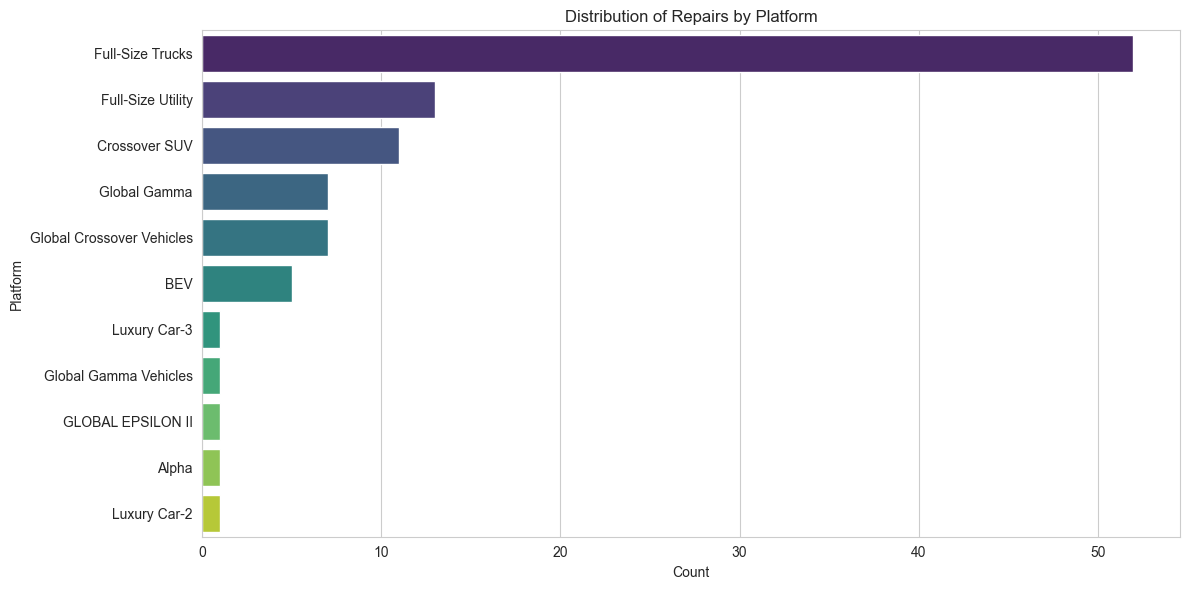

In [13]:
#1. distribution of repairs by platform
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, y='PLATFORM', order=df_clean['PLATFORM'].value_counts().index, palette='viridis')
plt.title('Distribution of Repairs by Platform')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [14]:
#Update specific value in CAUSAL_PART_NM column
#fixing for casual part distribution
df_clean['CAUSAL_PART_NM'] = df_clean['CAUSAL_PART_NM'].replace(
    'Wheel Asm-Strg * Jet Black', 'Wheel Asm-Strg *Jet Black'
)

In [15]:
# Exclude rows where the column contains 'Unknown' for proper display
df_barplot = df_clean[df_clean['CAUSAL_PART_NM'] != 'Unknown']

C:\Users\mudit\AppData\Local\Temp\ipykernel_12536\1208531048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_parts.values, y=top_parts.index, palette='viridis')


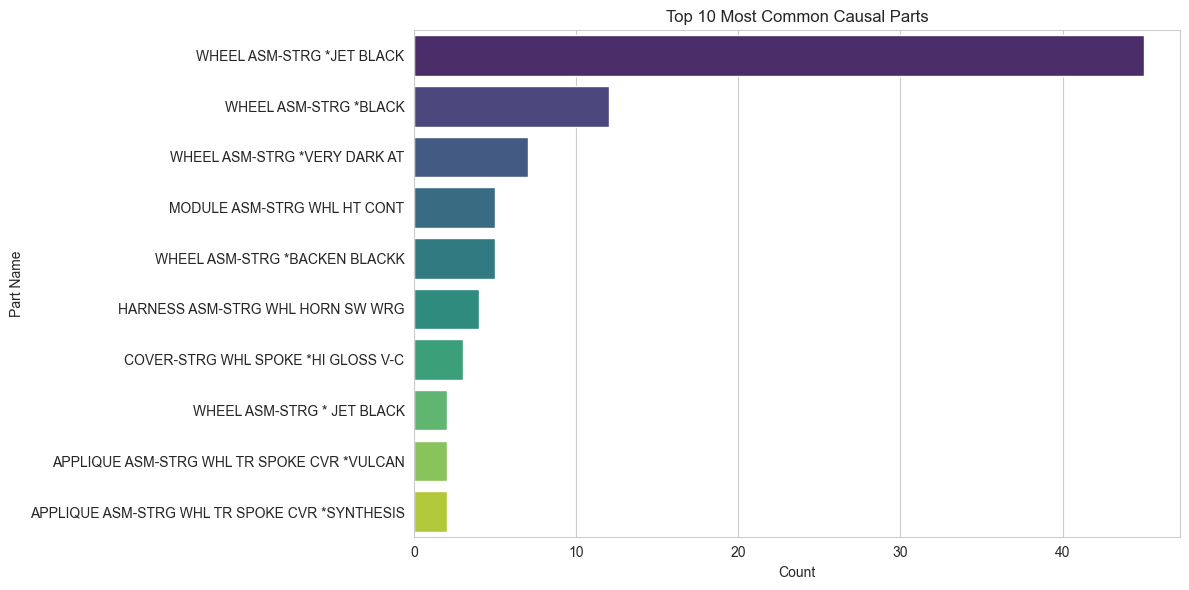

In [16]:
# 2. Causal Part Distribution
plt.figure(figsize=(12, 6))
top_parts = df_barplot['CAUSAL_PART_NM'].value_counts().head(10)
sns.barplot(x=top_parts.values, y=top_parts.index, palette='viridis')
plt.title('Top 10 Most Common Causal Parts')
plt.xlabel('Count')
plt.ylabel('Part Name')
plt.tight_layout()
plt.show()

C:\Users\mudit\AppData\Local\Temp\ipykernel_12536\2589275680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_repairs.values, y=top_repairs.index, palette='coolwarm')


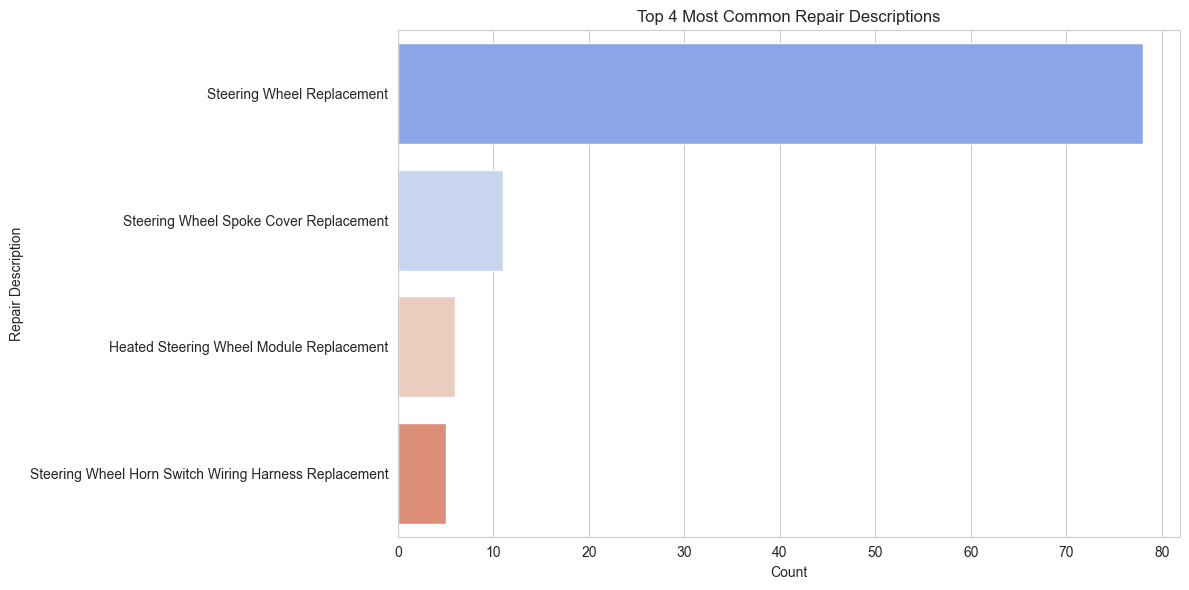

In [17]:
# 3. Repair Descriptions
plt.figure(figsize=(12, 6))
top_repairs = df_clean['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().head(10)
sns.barplot(x=top_repairs.values, y=top_repairs.index, palette='coolwarm')
plt.title('Top 4 Most Common Repair Descriptions')
plt.xlabel('Count')
plt.ylabel('Repair Description')
plt.tight_layout()
plt.show()

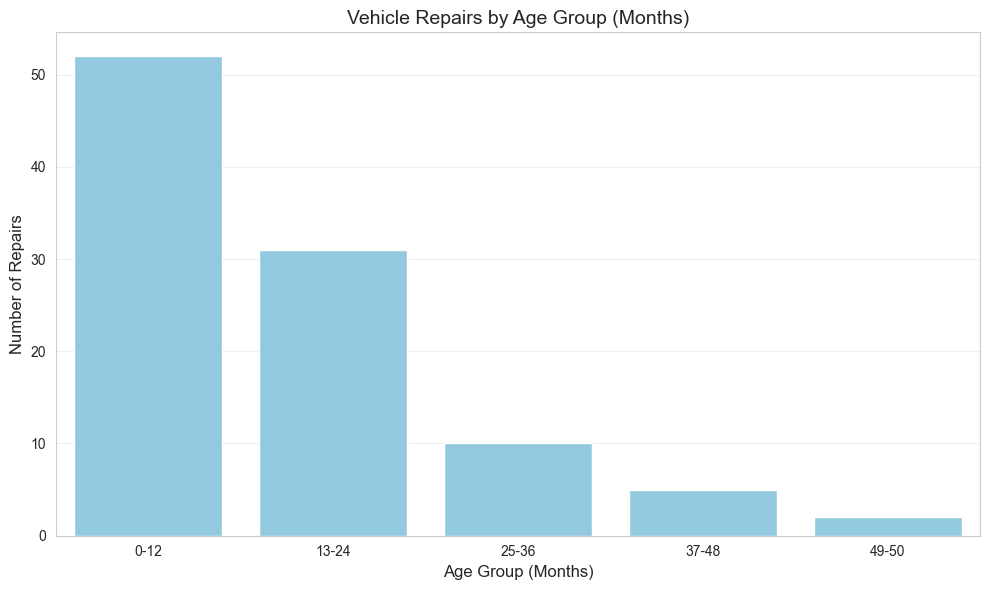

In [18]:
# 4. Repair Age Distribution
# Bin ages into groups (e.g., 0-6, 7-12, and so on)
df_clean['REPAIR_AGE'] = pd.to_numeric(df_clean['REPAIR_AGE'], errors='coerce')

df_clean['AGE_GROUP'] = pd.cut(
    df_clean['REPAIR_AGE'],
    bins=[0, 12, 24, 36, 48, 50],
    labels=['0-12', '13-24', '25-36', '37-48', '49-50'],
    right= True, #to include the right edge of the interval
    include_lowest=True, # to include the left edge of the interval
)
df_clean['AGE_GROUP'] = df_clean['AGE_GROUP'].astype(str)  # Convert to string to avoid being read as a date in excel after exporting


plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_clean,
    x='AGE_GROUP',
    order=['0-12', '13-24', '25-36', '37-48', '49-50'],
    color='Skyblue'
)
plt.title('Vehicle Repairs by Age Group (Months)', fontsize=14)
plt.xlabel('Age Group (Months)', fontsize=12)
plt.ylabel('Number of Repairs', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Generating Tags from Free Text Fields

In [50]:
# Function to extract and normalize issues from text
def extract_issues(text):
    if pd.isna(text) or not isinstance(text, str):  # Handle NaN and non-string inputs
        return []

    if text.strip().lower() == 'Unknown':
        return []
    
    # Dictionary of patterns and their normalized forms
    patterns = {
        r'not work(?:ing)?': 'not working',
        r'fail(?:ure|ed)?': 'failure',
        r'broken': 'broken',
        r'crack(?:ed|ing)?': 'cracked',
        r'peel(?:ing)?': 'peeling',
        r'loose': 'loose',
        r'separat(?:ing|ed)': 'separating',
        r'defect(?:ive)?': 'defective',
        r'malfunction': 'malfunction',
        r'inop(?:erative)?': 'inoperative',
        r'noise': 'noise',
        r'click(?:ing)?': 'clicking',
        r'stick(?:ing)?': 'sticking',
        r'tear(?:ing)?': 'tearing',
        r'wear(?:ing)?': 'wearing',
        r'leak(?:ing)?': 'leaking',
        r'corrod(?:ed|ing)?': 'corroded',
        r'overheat(?:ing)?': 'overheating',
        r'overload(?:ing)?': 'overloading',
        r'jam(?:med)?': 'jammed',
        r'fault(?:y)?': 'faulty',
        r'error(?:s)?': 'errors',
        r'problem(?:s)?': 'problems',
        r'issue(?:s)?': 'issues',
    }
    
    issues = []
    text_lower = text.lower()  # Convert text to lowercase for case-insensitive matching
    
    # Find and normalize issues
    for pattern, normalized in patterns.items():
        matches = re.findall(pattern, text_lower)  # Find all matches for the pattern
        issues.extend([normalized] * len(matches))  # Add normalized form for each match
    
    return list(set(issues))  # Remove duplicates

# Apply the function to customer verbatim and correction verbatim columns
df_clean['CUSTOMER_ISSUES'] = df_clean['CUSTOMER_VERBATIM'].apply(extract_issues)
df_clean['REPAIR_ISSUES'] = df_clean['CORRECTION_VERBATIM'].apply(extract_issues)

# Flatten all issues and count their frequency
all_customer_issues = [issue for sublist in df_clean['CUSTOMER_ISSUES'] for issue in sublist]
all_repair_issues = [issue for sublist in df_clean['REPAIR_ISSUES'] for issue in sublist]

customer_issue_counts = Counter(all_customer_issues)
repair_issue_counts = Counter(all_repair_issues)

# Display the top 10 most common issues for visualization
print("Top 10 Customer Issues:")
print(customer_issue_counts.most_common(10))

print("\nTop 10 Repair Issues:")
print(repair_issue_counts.most_common(10))

Top 10 Customer Issues:
[('not working', 10), ('loose', 9), ('inoperative', 7), ('peeling', 7), ('noise', 3), ('sticking', 2), ('clicking', 2), ('issues', 1), ('cracked', 1), ('tearing', 1)]

Top 10 Repair Issues:
[('inoperative', 6), ('loose', 5), ('defective', 3), ('faulty', 2), ('failure', 2), ('not working', 2), ('issues', 2), ('malfunction', 1), ('broken', 1), ('peeling', 1)]


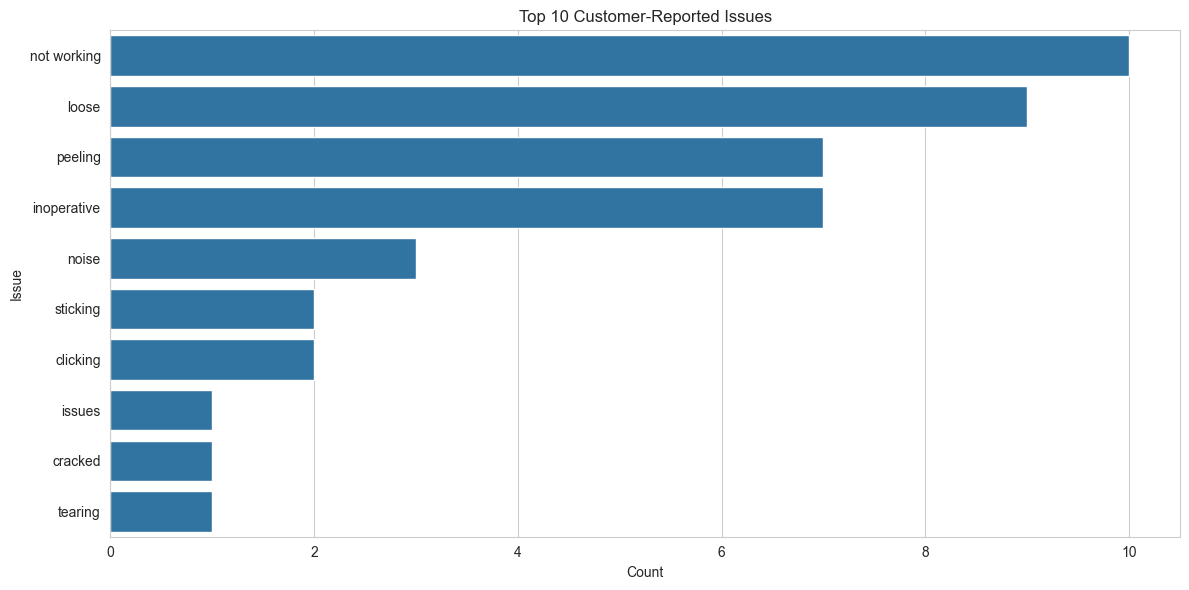

In [34]:
#top 10 customer issues
plt.figure(figsize=(12, 6))
top_customer_issues = pd.DataFrame.from_dict(customer_issue_counts, orient='index', columns=['count']).sort_values('count', ascending=False).head(10)
sns.barplot(x='count', y=top_customer_issues.index, data=top_customer_issues)
plt.title('Top 10 Customer-Reported Issues')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.tight_layout()
plt.show()

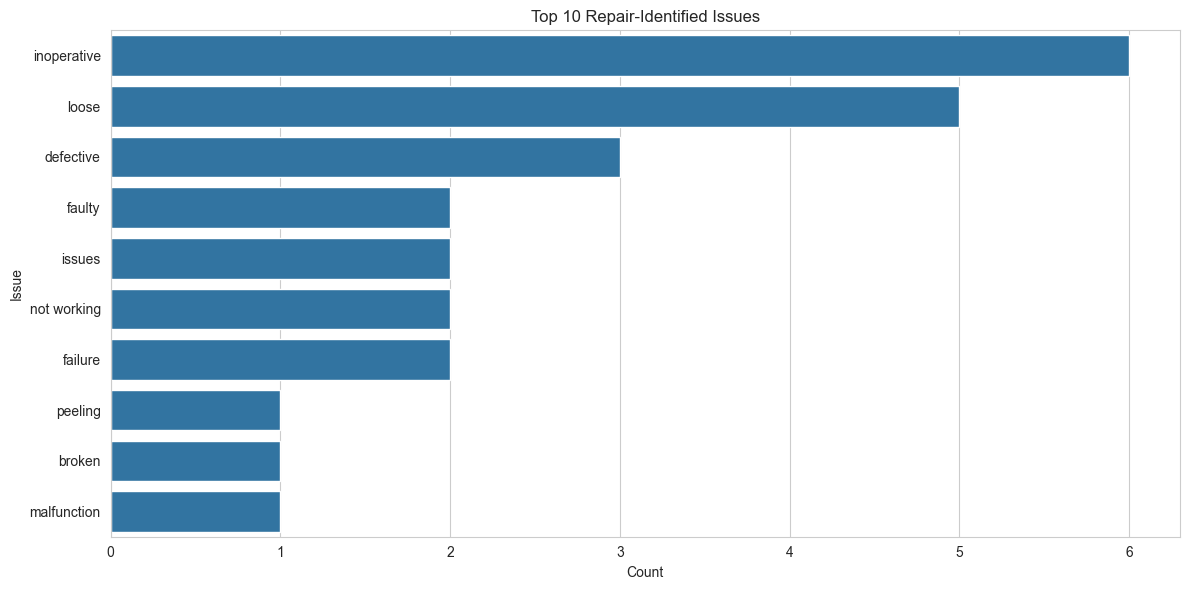

In [35]:
# top 10 repair-identified issues
plt.figure(figsize=(12, 6))
top_repair_issues = pd.DataFrame.from_dict(repair_issue_counts, orient='index', columns=['count']).sort_values('count', ascending=False).head(10)
sns.barplot(x='count', y=top_repair_issues.index, data=top_repair_issues)
plt.title('Top 10 Repair-Identified Issues')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.tight_layout()
plt.show()

## 7. Additional Analysis and Insights

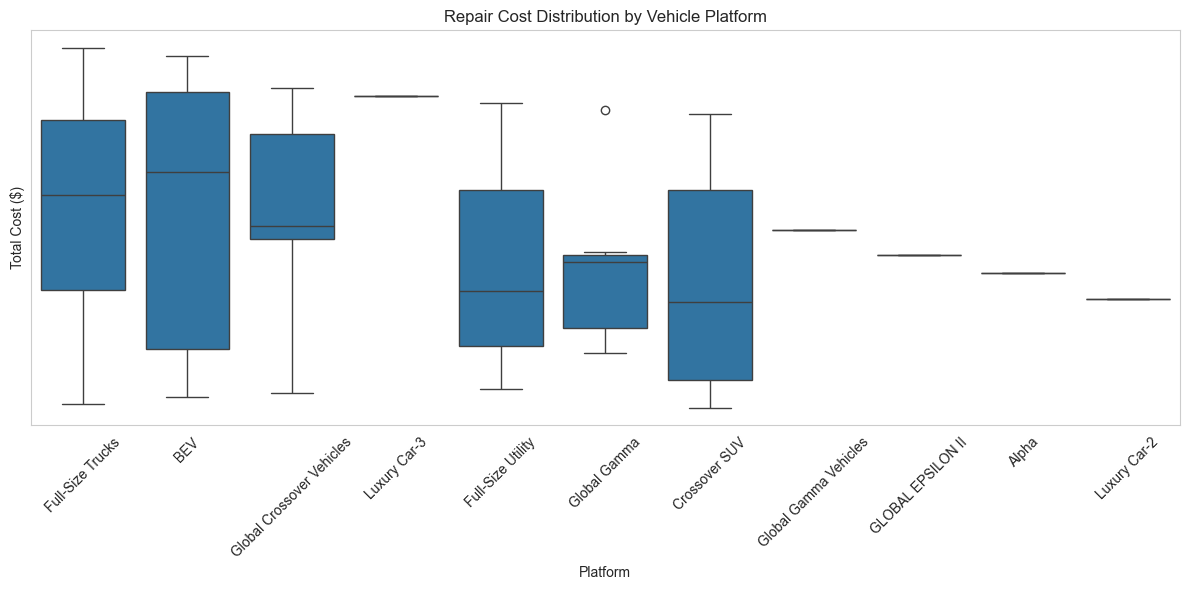

In [19]:
# Cost analysis by platform
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='PLATFORM', y='TOTALCOST')
plt.title('Repair Cost Distribution by Vehicle Platform')
plt.xlabel('Platform')
plt.ylabel('Total Cost ($)')
plt.yticks([])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Most expensive repairs
top_expensive_repairs = df_clean.sort_values('TOTALCOST', ascending=False).head(10)[['PLATFORM', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'AGE_GROUP' ,'TOTALCOST']]
print("Top 10 Most Expensive Repairs:")
display(top_expensive_repairs)

Top 10 Most Expensive Repairs:


,PLATFORM,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,AGE_GROUP,TOTALCOST
53,Full-Size Utility,WHEEL ASM-STRG *FAWN,Steering Wheel Replacement,0-12,963.92
51,Global Crossover Vehicles,COVER-STRG WHL SPOKE *HI GLOSS V-C,Steering Wheel Spoke Cover Replacement,13-24,960.87
45,Full-Size Trucks,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,13-24,787.93
34,BEV,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,0-12,737.49
54,Global Crossover Vehicles,COVER-STRG WHL SPOKE *HI GLOSS V-C,Steering Wheel Spoke Cover Replacement,13-24,697.51
26,Global Crossover Vehicles,COVER-STRG WHL SPOKE *HI GLOSS V-C,Steering Wheel Spoke Cover Replacement,49-50,695.8
62,Alpha,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,13-24,687.11
66,Full-Size Trucks,HARNESS ASM-STRG WHL HORN SW WRG,Steering Wheel Horn Switch Wiring Harness Repl...,25-36,674.27
14,Full-Size Trucks,COVER-STRG WHL AIRBAG ACC HOLE *JET BLACK,Steering Wheel Spoke Cover Replacement,0-12,63.1
75,Full-Size Trucks,WHEEL ASM-STRG *VERY DARK AT,Steering Wheel Replacement,0-12,622.24


In [ ]:
# Derive column 'TOTALCOST_FIXED' from column: 'TOTALCOST'
def TOTALCOST_FIXED(TOTALCOST):
    """
    Transform based on the following examples:
       TOTALCOST     Output
    1: "370.03"   => "370.03"
    2: "3,205.45" => "3205.45"
    """
    number1 = float(TOTALCOST.replace(",", ""))
    return f"{number1:04.2f}"

df_clean.insert(34, "TOTALCOST_FIXED", df_clean.apply(lambda row : TOTALCOST_FIXED(row["TOTALCOST"]), axis=1))

# Convert TOTALCOST_FIXED to numeric
df_clean['TOTALCOST_FIXED'] = pd.to_numeric(df_clean['TOTALCOST_FIXED'], errors='coerce')


In [25]:
# Common parts with highest average repair cost
part_cost_analysis = df_clean.groupby('CAUSAL_PART_NM').agg(
    count=('CAUSAL_PART_NM', 'size'),
    total_cost=('TOTALCOST_FIXED', 'sum'),
    avg_cost=('TOTALCOST_FIXED', 'mean'),
).sort_values('avg_cost', ascending=False)


print("Parts with Highest Average Repair Cost:")
display(round(part_cost_analysis.head(10),2))

Parts with Highest Average Repair Cost:


,count,total_cost,avg_cost
CAUSAL_PART_NM,,,
WHEEL ASM-STRG *BACKEN BLACKK,5,8311.85,1662.37
WHEEL ASM-STRG *FAWN,1,963.92,963.92
COVER-STRG WHL SPOKE *HI GLOSS V-C,3,2354.18,784.73
WHEEL ASM-STRG *BLACK,12,7860.74,655.06
HARNESS ASM-STRG WHL HORN SW WRG,4,2332.84,583.21
WHEEL ASM-STRG *VERY DARK AT,7,4009.33,572.76
WHEEL ASM-STRG *JET BLACK,45,24448.59,543.30
WHEEL ASM-STRG *DARK GALVANIE,1,524.56,524.56
WHEEL ASM-STRG * JET BLACK,2,831.94,415.97


In [27]:
# Common parts with highest repair cost
part_cost_analysis = df_clean.groupby('CAUSAL_PART_NM').agg(
    count=('CAUSAL_PART_NM', 'size'),
    total_cost=('TOTALCOST_FIXED', 'sum'),
).sort_values('total_cost', ascending=False)


print("Parts with Total Highest Repair Cost:")
display(round(part_cost_analysis.head(10),2))

Parts with Total Highest Repair Cost:


,count,total_cost
CAUSAL_PART_NM,,
WHEEL ASM-STRG *JET BLACK,45,24448.59
WHEEL ASM-STRG *BACKEN BLACKK,5,8311.85
WHEEL ASM-STRG *BLACK,12,7860.74
WHEEL ASM-STRG *VERY DARK AT,7,4009.33
COVER-STRG WHL SPOKE *HI GLOSS V-C,3,2354.18
HARNESS ASM-STRG WHL HORN SW WRG,4,2332.84
MODULE ASM-STRG WHL HT CONT,5,1069.76
WHEEL ASM-STRG *FAWN,1,963.92
WHEEL ASM-STRG * JET BLACK,2,831.94


## 8. Saving Cleaned Data and Results

In [51]:
df_clean.to_csv('cleaned_steering_repair_data.csv', index=False)

# matching lengths for both arrays
max_length = max(len(all_customer_issues), len(all_repair_issues))
padded_customer_issues = all_customer_issues + [''] * (max_length - len(all_customer_issues))
padded_repair_issues = all_repair_issues + [''] * (max_length - len(all_repair_issues))

tags_df = pd.DataFrame({
    'Customer_Issues': padded_customer_issues,
    'Repair_Issues': padded_repair_issues
})

tags_df.to_csv('generated_repair_tags.csv', index=False)